First, we simply do boosting on the original dataset csv format "features_30_sec.csv". We will set our original parameter values to:
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt

datafile = "features_30_sec.csv" 
data = pd.read_csv(datafile)

# drop rows w/ missing values
data = data.dropna()

X = data.drop(['filename', 'label'], axis=1)  
y = data['label'] 

# convert categorical labels into numerical vals
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 80-20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# fine-tuned parameter values

xgb_params = dict(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb = XGBClassifier(**xgb_params)
xgb.fit(X_train, y_train)

# get accuracies
train_preds = xgb.predict(X_train)
test_preds = xgb.predict(X_test)

test_accuracy = accuracy_score(y_test, test_preds)
print("Accuracy: ", test_accuracy)


Accuracy:  0.79


Here is the confusion matrix after classification:

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


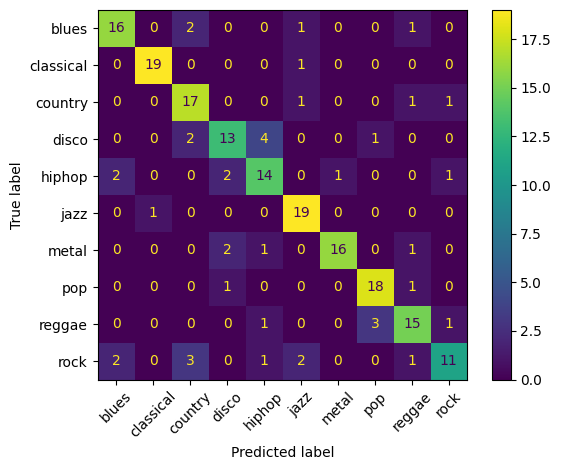

In [4]:
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay 
import numpy as np

labels = np.unique(y).tolist()
print(labels)
cm = confusion_matrix(y_test,test_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation=45)
plt.show()

We can also use the 3 second features dataset with XGBoost. Here, we also keep the parameter values at:
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt

datafile = "features_3_sec.csv" 
data = pd.read_csv(datafile)

# drop rows w/ missing values
data = data.dropna()

X = data.drop(['filename', 'label'], axis=1)  
y = data['label'] 

# convert categorical labels into numerical vals
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 80-20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# fine-tuned parameter values

xgb_params = dict(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb = XGBClassifier(**xgb_params)
xgb.fit(X_train, y_train)

# get accuracies
train_preds = xgb.predict(X_train)
test_preds = xgb.predict(X_test)

test_accuracy = accuracy_score(y_test, test_preds)
print("Accuracy: ", test_accuracy)


Accuracy:  0.8613613613613613


Here is the resulting confusion matrix from the 3 second dataset results.

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


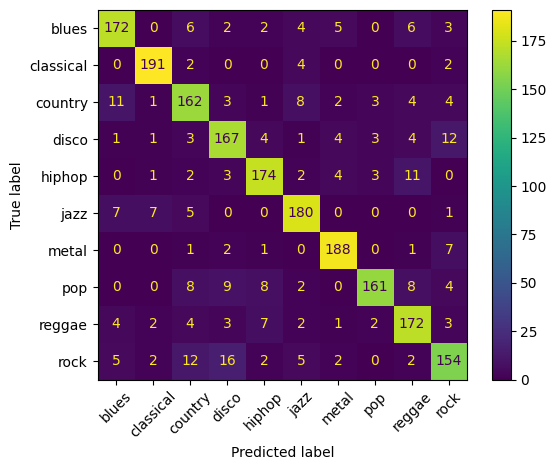

In [6]:
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay 
import numpy as np

labels = np.unique(y).tolist()
print(labels)
cm = confusion_matrix(y_test,test_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation=45)
plt.show()

We can improve accuracy by simply fine-tuning the parameter values for XGBoost. Let's try using XGBoost with various parameter values and plot a graph of the results. 

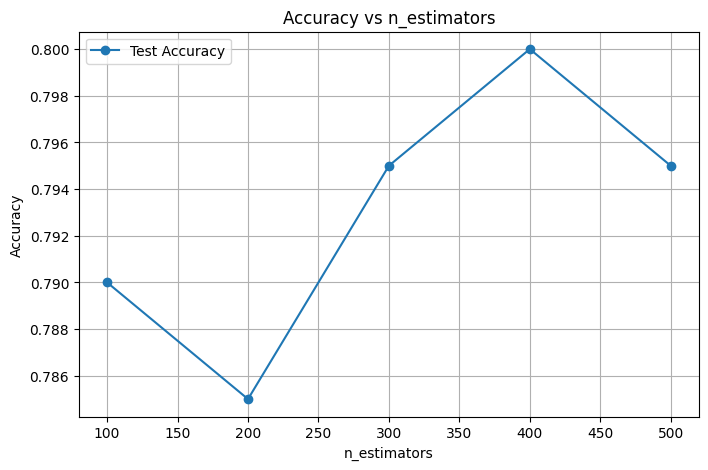

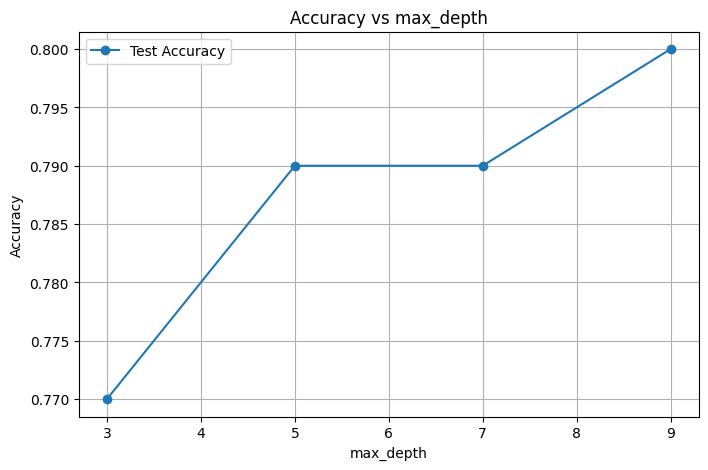

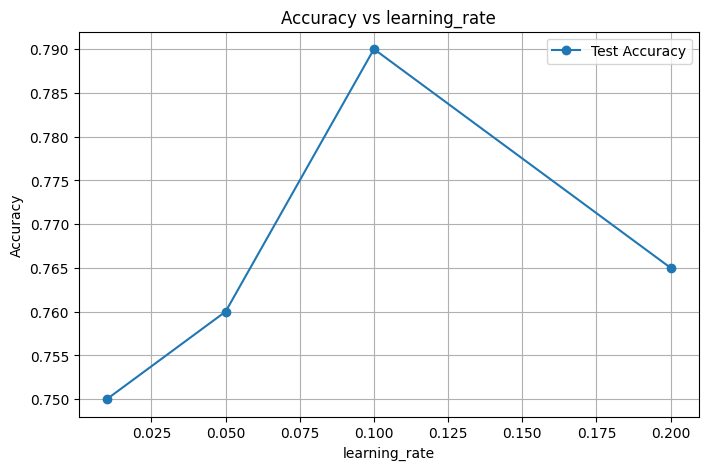

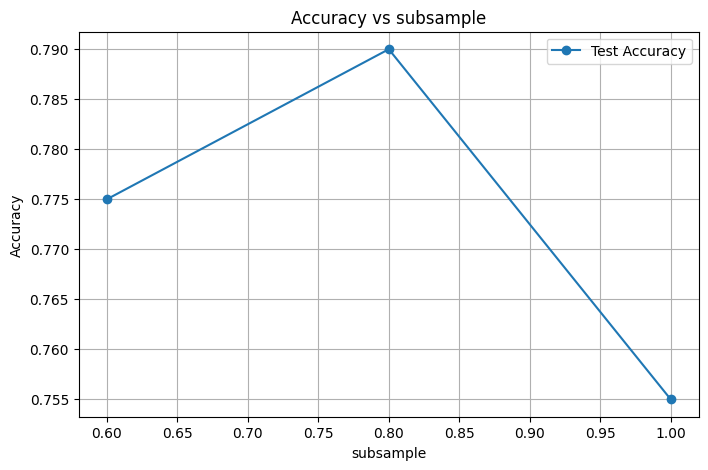

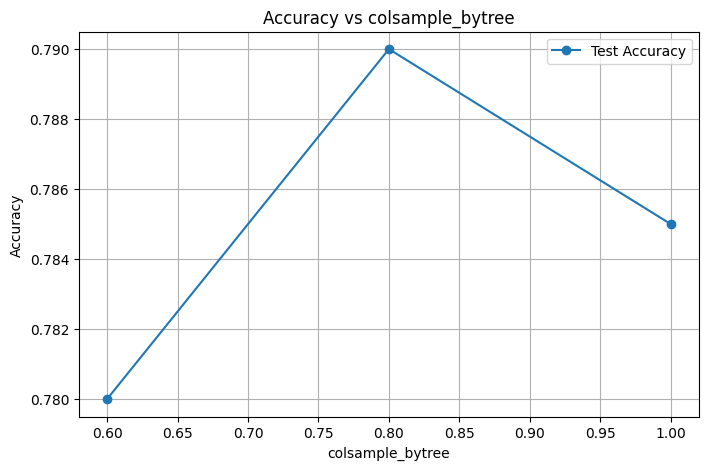

In [7]:


datafile = "features_30_sec.csv" 
data = pd.read_csv(datafile)
data = data.dropna()

X = data.drop(['filename', 'label'], axis=1)  
y = data['label'] 

# convert categorical labels into numerical vals
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 80-20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# initialize xgboost model

# params to test
n_estimators = [100, 200, 300, 400, 500]
max_depths = [3, 5, 7, 9]
learning_rates = [0.01, 0.05, 0.1, 0.2]
subsamples = [0.6, 0.8, 1.0]
colsample_bytrees = [0.6, 0.8, 1.0]

def evaluate_parameter(param_vals, param_name):
    train_accuracies = []
    test_accuracies = []
    
    for param in param_vals:
        xgb_params = {
            'n_estimators': 100,
            'max_depth': 5,
            'learning_rate': 0.1,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'random_state': 42
        }
        # change given param
        xgb_params[param_name] = param

        xgb = XGBClassifier(**xgb_params)
        xgb.fit(X_train, y_train)

        # get accuracies
        train_preds = xgb.predict(X_train)
        test_preds = xgb.predict(X_test)
        train_accuracies.append(accuracy_score(y_train, train_preds))
        test_accuracies.append(accuracy_score(y_test, test_preds))
    
    return train_accuracies, test_accuracies

# plot accuracies for each param
parameters = {
    'n_estimators': n_estimators,
    'max_depth': max_depths,
    'learning_rate': learning_rates,
    'subsample': subsamples,
    'colsample_bytree': colsample_bytrees
}

for param_name, param_vals in parameters.items():
    train_acc, test_acc = evaluate_parameter(param_vals, param_name)
    plt.figure(figsize=(8, 5))
    plt.plot(param_vals, test_acc, label='Test Accuracy', marker='o')
    plt.title(f"Accuracy vs {param_name}")
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()


After trying various parameter values, it was decided to use n_estimators of 400, max depth of 9, learning rate of 0.1, subsample 0.8, and colsample_bytree 0.8.

Let's train once more using the fine-tuned parameter values:

In [144]:
datafile = "features_30_sec.csv" 
data = pd.read_csv(datafile)

# drop rows w/ missing values
data = data.dropna()

X = data.drop(['filename', 'label'], axis=1)  
y = data['label'] 

# convert categorical labels into numerical vals
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 80-20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# fine-tuned parameter values

xgb_params = dict(
    n_estimators=400,
    max_depth=9,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb = XGBClassifier(**xgb_params)
xgb.fit(X_train, y_train)

# get accuracies
train_preds = xgb.predict(X_train)
test_preds = xgb.predict(X_test)

test_accuracy = accuracy_score(y_test, test_preds)
print("Accuracy: ", test_accuracy)

Accuracy:  0.805


We can see that accuracy improved from 0.79 to 0.805 using the fine-tuned parameter values on the "features_30_sec.csv" dataset. Here is the confusion matrix for fine-tuned XGBoost using the "features_30_sec.csv" dataset:

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


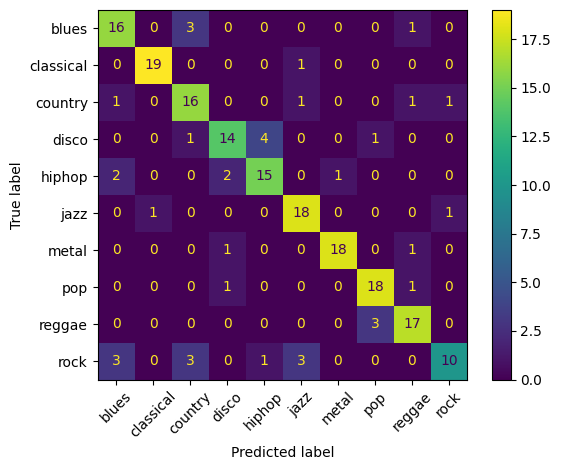

In [145]:
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay 
import numpy as np

labels = np.unique(y).tolist()
print(labels)
cm = confusion_matrix(y_test,test_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation=45)
plt.show()


Now, we will use the same XGBoost parameters on the 3_sec csv dataset to see if we get an improvement in results: 

Accuracy:  0.9084084084084084
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


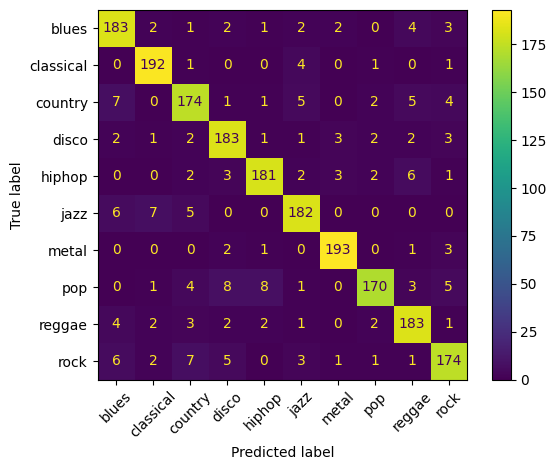

In [9]:
datafile = "features_3_sec.csv" 
data = pd.read_csv(datafile)

# drop rows w/ missing values
data = data.dropna()

X = data.drop(['filename', 'label'], axis=1)  
y = data['label'] 

# convert categorical labels into numerical vals
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 80-20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# fine-tuned parameter values

xgb_params = dict(
    n_estimators=400,
    max_depth=9,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb = XGBClassifier(**xgb_params)
xgb.fit(X_train, y_train)

# get accuracies
train_preds = xgb.predict(X_train)
test_preds = xgb.predict(X_test)

test_accuracy = accuracy_score(y_test, test_preds)
print("Accuracy: ", test_accuracy)

labels = np.unique(y).tolist()
print(labels)
cm = confusion_matrix(y_test,test_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation=45)
plt.show()

We see from the results that fine-tuning on "features_3_sec.csv" improved accuracy from 0.861 to 0.908. Fine-tuning has improved accuracy on both datasets.

Next, let's see if we can improve accuracy of our classifier by use of Bagging methods:

In [10]:
from sklearn.ensemble import BaggingClassifier

datafile = "features_3_sec.csv" 
data = pd.read_csv(datafile)

# drop rows w/ missing values
data = data.dropna()

X = data.drop(['filename', 'label'], axis=1)  
y = data['label'] 

# convert categorical labels into numerical vals
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 80-20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# fine-tuned parameter values

xgb_params = dict(
    n_estimators=400,
    max_depth=9,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb = XGBClassifier(**xgb_params)

# we use 10 estimators of XGBoost
bagging = BaggingClassifier(estimator=xgb, n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)

test_preds = bagging.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print("Test Accuracy:", test_accuracy)

print("\nClassification Report:")
print(classification_report(y_test, test_preds))

Test Accuracy: 0.8908908908908909

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       200
           1       0.92      0.97      0.94       199
           2       0.84      0.85      0.85       199
           3       0.86      0.88      0.87       200
           4       0.90      0.90      0.90       200
           5       0.90      0.91      0.90       200
           6       0.94      0.95      0.95       200
           7       0.92      0.85      0.89       200
           8       0.87      0.90      0.88       200
           9       0.89      0.81      0.85       200

    accuracy                           0.89      1998
   macro avg       0.89      0.89      0.89      1998
weighted avg       0.89      0.89      0.89      1998



We can see that Bagging did not improve accuracy on the "features_3_sec.csv" dataset. Instead, let's try to use stacking to improve our accuracy and overall results. We will start by stacking with XGBoost and RandomForest, using LR as our final estimator.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

datafile = "features_3_sec.csv" 
data = pd.read_csv(datafile)

# drop rows w/ missing values
data = data.dropna()

X = data.drop(['filename', 'label'], axis=1)  
y = data['label'] 

# convert categorical labels into numerical vals
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 80-20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=9,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

# stacking ensemble with lr
stacked_model = StackingClassifier(
    estimators=[
        ('xgb', xgb),
        ('rf', rf)
    ],
    final_estimator=LogisticRegression(),
    cv=5  
)

stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9109109109109109


We can see that by using Stacking rather than Bagging, we obtain performance improvements. The accuracy with stacking is 0.911, whereas we obtain an accuracy of 0.908 using XGBoost alone. Here is the confusion matrix: 

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


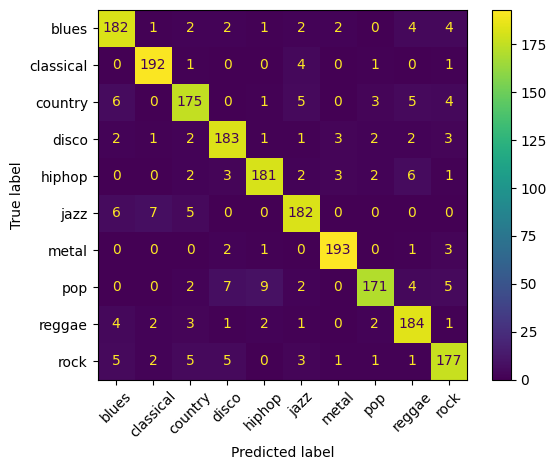

In [13]:
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay 
import numpy as np

labels = np.unique(y).tolist()
print(labels)
cm = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation=45)
plt.show()

By stacking using 3 classifiers: XGBoost, Random Forest, and LGBM, we can improve performance even further. 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14327
[LightGBM] [Info] Number of data points in the train set: 7992, number of used features: 57
[LightGBM] [Info] Start training from score -2.301585
[LightGBM] [Info] Start training from score -2.302835
[LightGBM] [Info] Start training from score -2.304088
[LightGBM] [Info] Start training from score -2.302835
[LightGBM] [Info] Start training from score -2.304088
[LightGBM] [Info] Start training from score -2.301585
[LightGBM] [Info] Start training from score -2.301585
[LightGBM] [Info] Start training from score -2.301585
[LightGBM] [Info] Start training from score -2.301585
[LightGBM] [Info] Start training from score -2.304088
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

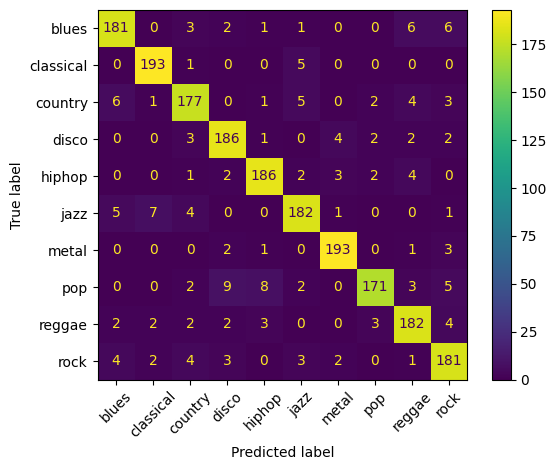

In [14]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import pandas as pd

datafile = "features_3_sec.csv" 
data = pd.read_csv(datafile)

# drop rows w/ missing values
data = data.dropna()

X = data.drop(['filename', 'label'], axis=1)  
y = data['label'] 

# convert categorical labels into numerical vals
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 80-20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=9,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

lgbm = LGBMClassifier(
    n_estimators=400,
    max_depth=9,
    learning_rate=0.1,
    random_state=42
)

stacked_model = StackingClassifier(
    estimators=[
        ('xgb', xgb),
        ('rf', rf),
        ('lgbm', lgbm)
    ],
    final_estimator=LogisticRegression(),
    cv=5  
)

stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

labels = np.unique(y).tolist()
print(labels)
cm = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation=45)
plt.show()

By stacking with RF, LGBM, and XGBoost, we get even better performance, with an accuracy of 0.917.

For future work, we can potentially look at feature importance as well as correlation between features to determine which features should be ignored or combined in the dataset. 

<Figure size 1000x800 with 0 Axes>

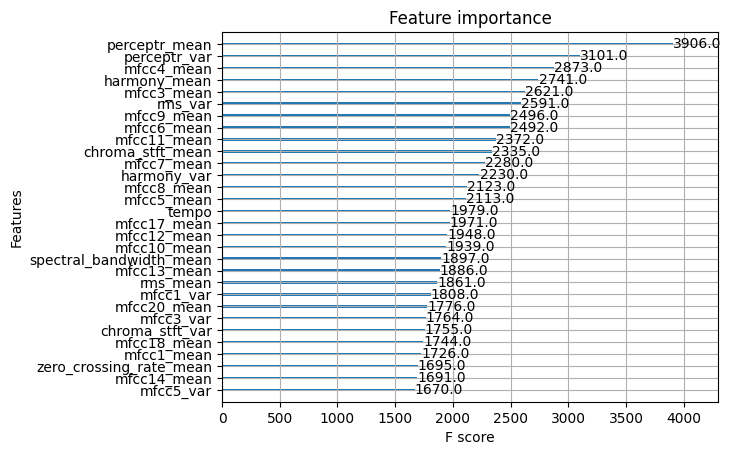

In [17]:
from xgboost import plot_importance


datafile = "features_3_sec.csv" 
data = pd.read_csv(datafile)

# drop rows w/ missing values
data = data.dropna()

X = data.drop(['filename', 'label'], axis=1)  
y = data['label'] 

# convert categorical labels into numerical vals
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 80-20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# fine-tuned parameter values

xgb_params = dict(
    n_estimators=400,
    max_depth=9,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb = XGBClassifier(**xgb_params)
xgb.fit(X_train, y_train)

# get feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb, max_num_features=30)  
plt.show()

Here, we see the top 30 most important features from the dataset. 

When we evaluate performance using just the top 30 features, performance is reduced. However, we might possibly be able to use this feature importance knowledge in a better way in future works to improve performance. 

In [18]:

booster = xgb.get_booster()
importance = booster.get_score(importance_type='weight')
importance_sorted = sorted(importance.items(), key=lambda x: x[1], reverse=True)
top_features = [feature for feature, _ in importance_sorted[:52]]
print("Top Features:", top_features)

# drop all non-top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# retrain model with reduced dataset
xgb.fit(X_train_top, y_train)

test_preds = xgb.predict(X_test_top)
test_accuracy = accuracy_score(y_test, test_preds)
print("Test Accuracy:", test_accuracy)

Top Features: ['perceptr_mean', 'perceptr_var', 'mfcc4_mean', 'harmony_mean', 'mfcc3_mean', 'rms_var', 'mfcc9_mean', 'mfcc6_mean', 'mfcc11_mean', 'chroma_stft_mean', 'mfcc7_mean', 'harmony_var', 'mfcc8_mean', 'mfcc5_mean', 'tempo', 'mfcc17_mean', 'mfcc12_mean', 'mfcc10_mean', 'spectral_bandwidth_mean', 'mfcc13_mean', 'rms_mean', 'mfcc1_var', 'mfcc20_mean', 'mfcc3_var', 'chroma_stft_var', 'mfcc18_mean', 'mfcc1_mean', 'zero_crossing_rate_mean', 'mfcc14_mean', 'mfcc5_var', 'mfcc2_mean', 'mfcc16_mean', 'mfcc4_var', 'spectral_bandwidth_var', 'mfcc6_var', 'mfcc19_mean', 'mfcc15_mean', 'mfcc19_var', 'mfcc7_var', 'mfcc8_var', 'mfcc20_var', 'rolloff_var', 'spectral_centroid_mean', 'mfcc9_var', 'spectral_centroid_var', 'mfcc2_var', 'mfcc10_var', 'mfcc12_var', 'rolloff_mean', 'zero_crossing_rate_var', 'mfcc18_var', 'mfcc14_var']
Test Accuracy: 0.9044044044044044


In [61]:
!pip3 install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


We can also potentially look at the correlation of the features in the dataset to combine features / better work with the dataset. 

<Axes: >

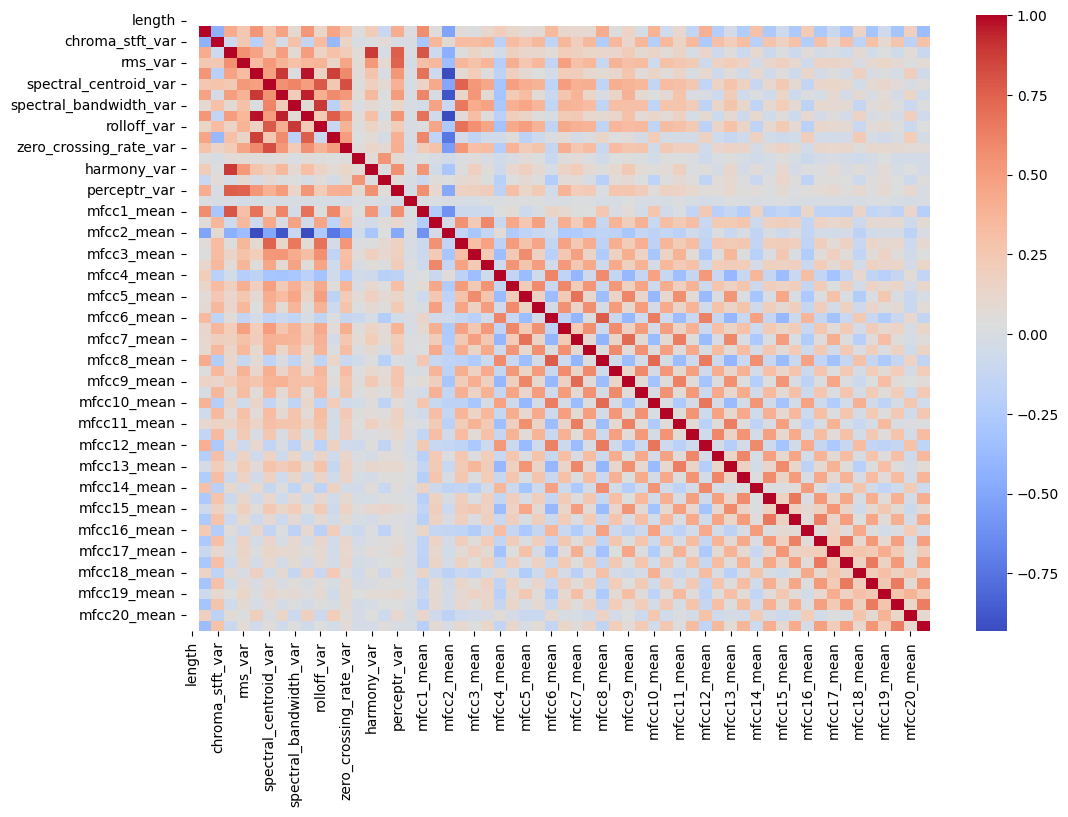

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')